In [1]:
## Basic packages

%pylab inline
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from PIL import Image
# import matplotlib.patches as patches
# from list_name import index

import os,sys
# sys.path.append("/lab/software/apparatus3/py")
# import qrange
from scipy.special import erf
import pandas
# import statdat
# import matplotlib.gridspec as gridspec
# import matplotlib as mpl
# import scipy
# from scipy.optimize import curve_fit
# #To make sure we have always the same matplotlib settings
# #(the ones in comments are the ipython notebook settings)

# mpl.rcParams['figure.figsize']=(16.0,12.0)    #(6.0,4.0)
# mpl.rcParams['font.size']=12                #10 
# mpl.rcParams['savefig.dpi']=100             #72 
# mpl.rcParams['figure.subplot.bottom']=.1    #.1

import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import qutip as qtp
from matplotlib import cm
from ipywidgets import *
pd.set_option('display.precision', 3)
from mpl_toolkits.mplot3d import Axes3D


# https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-a-3d-plot
# from matplotlib.patches import FancyArrowPatch
# from mpl_toolkits.mplot3d import proj3d

# class Arrow3D(FancyArrowPatch):
#     def __init__(self, xs, ys, zs, *args, **kwargs):
#         FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
#         self._verts3d = xs, ys, zs

#     def draw(self, renderer):
#         xs3d, ys3d, zs3d = self._verts3d
#         xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
#         self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
#         FancyArrowPatch.draw(self, renderer)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
## Formating misc 

def bold(s):
        return "\033[1m"+s+"\033[0;0m"
    
    
cc = ['#686868','#97552a','#3771c8','#d40000','#3b8f67','#ff8c00','#800080', '#d35fbc', '#4cc3d9']


ccmap = 'PuOr'
## black = 1a1a1a
## brown = c87137
## blue = 3771c8
## red = d40000
## green = 51b787
## yellow = ff8c00
## purple = 93648d
# cyan == 4cc3d9
## pink = d35fbc    

[[0.57735027]
 [0.57735027]
 [0.57735027]]
[[0.57735027]
 [0.57735027]
 [0.57735027]]
BB
[[-6.123234e-17]
 [ 1.000000e+00]
 [ 0.000000e+00]]


Text(0, 0.5, '$\\vec{B}\\cdot \\hat{s}$')

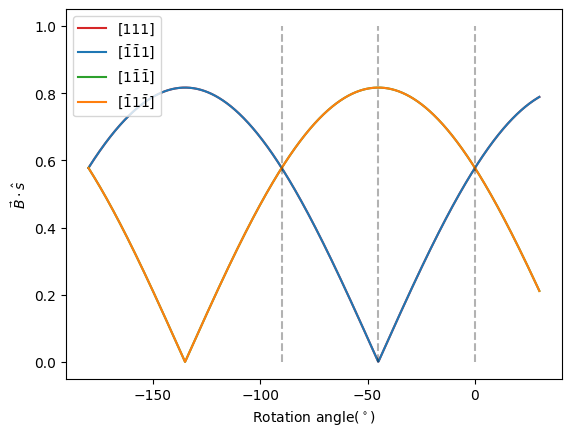

In [3]:
C = np.array([[1/sqrt(2),-1.0j/sqrt(2),0],\
             [1/sqrt(2),1.0j/sqrt(2),0],\
            [0,0,1]])

Cinv = np.array([[1/sqrt(2),1/sqrt(2),0],\
             [1.0j/sqrt(2),-1.0j/sqrt(2),0],\
            [0,0,1]])

def Rxphi(phi):
    return np.array([[1,0,0],\
             [0,cos(phi),-sin(phi)],\
            [0,sin(phi),cos(phi)]])

def Rzth(th):
    return np.array([[cos(th),-sin(th),0],\
            [sin(th),cos(th),0],\
            [0,0,1]])



def pol_rotator(Psi,th,phi):
    print(th)
    print(phi)
    return np.squeeze(np.asarray(Rxphi(phi).dot(Rzth(th)).dot(Cinv).dot(Psi)))

f = pi/2

test = np.array([[1,1,1]]).transpose()*1/(np.sqrt(3))
# test = np.array([[1,1,1]])*1/(np.sqrt(3))

def rads(th):
    return th*np.pi/180

def mag(v):
    return v.transpose().dot(v)[0][0]

def cdot(v1,v2):
    return v1.transpose().dot(v2)[0][0]

th_x = rads(0)

fig, ax = plt.subplots()

print(test)

nv_1 = Rxphi(th_x).dot(np.array([[1,1,1]]).transpose()*1/(np.sqrt(3)))
nv_2 = Rxphi(th_x).dot(np.array([[-1,-1,1]]).transpose()*1/(np.sqrt(3)))
nv_3 = Rxphi(th_x).dot(np.array([[1,-1,-1]]).transpose()*1/(np.sqrt(3)))
nv_4 = Rxphi(th_x).dot(np.array([[-1,1,-1]]).transpose()*1/(np.sqrt(3)))

B = np.array([[-1,0,0]]).transpose()
BB = Rxphi(th_x).dot(Rzth(rads(-90))).dot(B)
BB = Rxphi(-th_x).dot(Rzth(rads(-90))).dot(B)

print(nv_1)
print('BB')
print(BB)
# print(cdot(B,nv_1))

angles = np.linspace(-180,30,1000)
# print(angles)
# # B = Rzth(rads(-90)).dot(B)

# print(nv_)
# print(cdot(B,nv_))


# print(cdot(Rzth(rads(-90)).dot(B),nv_))
# print(rads(angles))

dot1 = np.array([cdot(Rzth(rads(x)).dot(B),nv_1) for x in angles])
dot2 = np.array([cdot(Rzth(rads(x)).dot(B),nv_2) for x in angles])
dot3 = np.array([cdot(Rzth(rads(x)).dot(B),nv_3) for x in angles])
dot4 = np.array([cdot(Rzth(rads(x)).dot(B),nv_4) for x in angles])

ax.plot(angles,abs(dot1),color = 'C3', label = r'[111]')
ax.plot(angles,abs(dot2),color = 'C0', label = r'[$\bar{1}\bar{1}1$]')
ax.plot(angles,abs(dot3),color = 'C2', label = r'[$1\bar{1}\bar{1}$]')
ax.plot(angles,abs(dot4),color = 'C1', label = r'[$\bar{1}1\bar{1}$]')

ax.plot([0]*2,[0,1], color = 'k', linestyle = '--', alpha = 0.3)
ax.plot([-45]*2,[0,1], color = 'k', linestyle = '--', alpha = 0.3)
ax.plot([-90]*2,[0,1], color = 'k', linestyle = '--', alpha = 0.3)
ax.legend(loc = 2)
ax.set_xlabel(r'Rotation angle($^\circ$)')
ax.set_ylabel(r'$\vec{B}\cdot \hat{s}$')
# ax.set_xticks(np.arange(-180,30,30))
# print([cdot(Rzth(rads(x)).dot(B),nv_) for x in angles])
# angles = np.linspace()


# print(Rxphi(f).dot(Cinv).dot(test))
# print(Rzth(0).dot(Rxphi(f)).dot(Cinv).dot(test))
# print(C.dot(Rzth(0)).dot(Rxphi(f)).dot(Cinv).dot(test))
# print(C.dot(Rzth(0)).dot(Rxphi(f)).dot(Cinv).dot(test)[:][0])

In [6]:
nv_1

array([[0.57735027],
       [0.57735027],
       [0.57735027]])

<IPython.core.display.Javascript object>


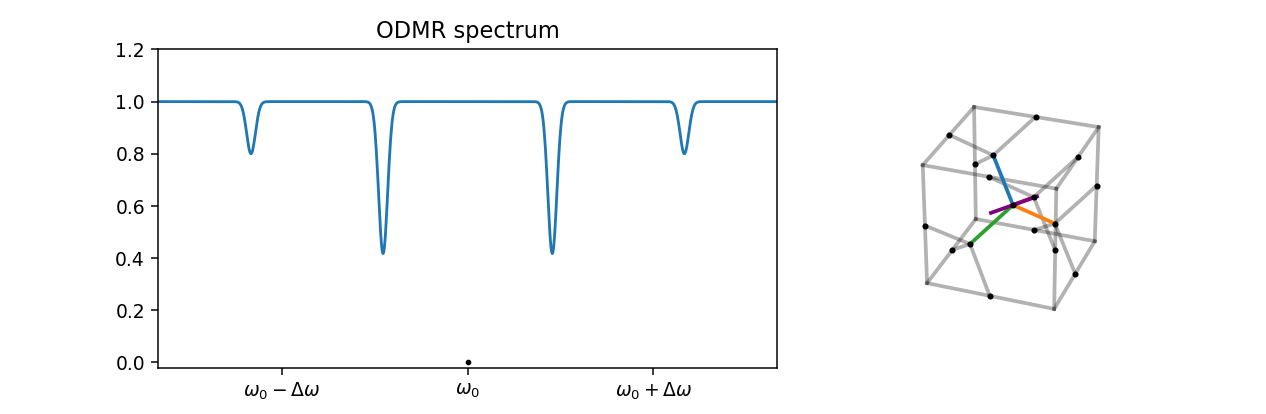

56
57


interactive(children=(FloatSlider(value=0.0, description='$\\theta$', max=180.0, min=-180.0, step=0.001), Floa…

In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi,1000)
xx = np.linspace(-5, 5,1000)

grid = plt.GridSpec(1, 3, wspace=0.4, hspace=0.6)


fig = plt.figure()

# ax = fig.add_subplot(2, 2, 1)
# ax2 = fig.add_subplot(2, 2, 3)
# ax3 = fig.add_subplot(1, 3, 3)

ax = plt.subplot(grid[0, :2])
# ax1 = plt.subplot(grid[1,:1])
# ax2 = plt.subplot(grid[2,:2])
ax3 = plt.subplot(grid[0:, 2],projection='3d')


s_s = 5
c_c = 'k'

ax3.scatter([0.5], [0], [0], color=c_c, s=s_s)
ax3.scatter([0], [0.5], [0], color=c_c, s=s_s)
ax3.scatter([1], [0.5], [0], color=c_c, s=s_s)
ax3.scatter([0.5], [1.0], [0], color=c_c, s=s_s)

ax3.scatter([0.5], [0], [1], color=c_c, s=s_s)
ax3.scatter([0], [0.5], [1], color=c_c, s=s_s)
ax3.scatter([1], [0.5], [1], color=c_c, s=s_s)
ax3.scatter([0.5], [1.0], [1], color=c_c, s=s_s)

ax3.scatter([0], [0], [0.5], color=c_c, s=s_s)
ax3.scatter([0], [1], [0.5], color=c_c, s=s_s)
ax3.scatter([1], [0], [0.5], color=c_c, s=s_s)
ax3.scatter([1], [1.0], [0.5], color=c_c, s=s_s)


ax3.scatter([0.5], [0.5], [0.5], color=c_c, s=s_s)
ax3.scatter([0.75], [0.25], [0.25], color=c_c, s=s_s)
ax3.scatter([0.25], [0.75], [0.25], color=c_c, s=s_s)
ax3.scatter([0.25], [0.25], [0.75], color=c_c, s=s_s)
ax3.scatter([0.75], [0.75], [0.75], color=c_c, s=s_s)


l_w = 2
a_l = 0.3

ax3.plot([1]*2,[0]*2,[0,1], color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([0]*2,[0]*2,[0,1], color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([0]*2,[1]*2,[0,1], color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([1]*2,[1]*2,[0,1], color = 'k', alpha = a_l, linewidth = l_w)

ax3.plot([0]*2,[0,1],[0]*2, color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([0]*2,[0,1],[1]*2, color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([1]*2,[0,1],[0]*2, color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([1]*2,[0,1],[1]*2, color = 'k', alpha = a_l, linewidth = l_w)

ax3.plot([0,1],[0]*2,[0]*2, color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([0,1],[0]*2,[1]*2, color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([0,1],[1]*2,[0]*2, color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([0,1],[1]*2,[1]*2, color = 'k', alpha = a_l, linewidth = l_w)


ax3.plot([0.75,0.5],[0.25,0],[0.25,0], color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([0.75,1],[0.25,0.5],[0.25,0], color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([0.75,1],[0.25,0],[0.25,0.5], color = 'k', alpha = a_l, linewidth = l_w)

ax3.plot([0.25,0.5],[0.75,1],[0.25,0], color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([0.25,0],[0.75,0.5],[0.25,0], color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([0.25,0],[0.75,1],[0.25,0.5], color = 'k', alpha = a_l, linewidth = l_w)

ax3.plot([0.75,1],[0.75,1],[0.75,0.5], color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([0.75,1],[0.75,0.5],[0.75,1], color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([0.75,0.5],[0.75,1],[0.75,1], color = 'k', alpha = a_l, linewidth = l_w)

ax3.plot([0.25,0],[0.25,0],[0.75,0.5], color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([0.25,0.5],[0.25,0],[0.75,1], color = 'k', alpha = a_l, linewidth = l_w)
ax3.plot([0.25,0],[0.25,0.5],[0.75,1], color = 'k', alpha = a_l, linewidth = l_w)


ax3.plot([0.5,0.75],[0.5,0.75],[0.5,0.75], color = 'C3', alpha = 1, linewidth = l_w)
ax3.plot([0.5,0.25],[0.5,0.25],[0.5,0.75], color = 'C0', alpha = 1, linewidth = l_w)
ax3.plot([0.5,0.25],[0.5,0.75],[0.5,0.25], color = 'C1', alpha = 1, linewidth = l_w)
ax3.plot([0.5,0.75],[0.5,0.25],[0.5,0.25], color = 'C2', alpha = 1, linewidth = l_w)


# a = Arrow3D([0.5,0.5],[0,1],[0.5,0.5], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
# ax3.add_artist(a)

B_ = np.array([[0,0,1]]).transpose()
BB_ = Rxphi(rads(0)).dot(Rzth(rads(-0))).dot(B_)

ff = 0.5

print(len(ax3.get_children()))
bfield,=ax3.plot([0.5-ff*BB_[0][0],0.5+ff*BB_[0][0]],[0.5-ff*BB_[1][0],0.5+ff*BB_[1][0]],[0.5-ff*BB_[2][0],0.5+ff*BB_[2][0]], color = 'purple', alpha = 1, linewidth = 2)
print(len(ax3.get_children()))

# ax3.quiver(0.5,0,0.5,0.5,1,0.5, color = 'mediumpurple', alpha = 1, linewidth = 10)

#   ax.plot([VecStart_x[i], VecEnd_x[i]], [VecStart_y[i],VecEnd_y[i]],zs=[VecStart_z[i],VecEnd_z[i]])
ax3.set_aspect('equal')
ax3.view_init(30, 20)
# ax3.view_init(0, 0)
# Hide grid lines
ax3.grid(False)

# Hide axes ticks
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_zticks([])

ax3.xaxis.pane.fill = False
ax3.yaxis.pane.fill = False
ax3.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax3.xaxis.pane.set_edgecolor('w')
ax3.yaxis.pane.set_edgecolor('w')
ax3.zaxis.pane.set_edgecolor('w')

ax3.set_axis_off()

# ax3.plot([0,0.9],[0.5]*2, color = 'k', linewidth = 2)
# ax3.plot([0,0.9],[0.01]*2, color = 'k', linewidth = 2)
ax.set_xlim([-5,5])
ax.set_ylim([-0.02,1.2])
# ax2.set_ylim([-0.2,1.2])
# ax2.set_ylim([-5,5])
# ax2.set_ylim([-0.02,1.2])
# ax3.set_ylim([0,1])
# ax3.set_xlim([0,1])

# line, = ax.plot(x, np.sin(x))

line, = ax.plot(xx, 1-0.15*np.exp(-xx**2/(0.1)), color = 'C0')
points, = ax.plot([0], [1-np.exp(-0**2)],'o',color = 'k',linewidth =0, markersize =2)
# line2, = ax2.plot(xx, 1-np.exp(-xx**2), label = 'Ground state')

# line3, = ax1.plot(xx, 1-np.exp(-xx**2/(0.1)), color = 'C1', label = 'Exited state')

# print(ax3.get_children())
# ax3.annotate(r'$|e\rangle$',(0.95,0.49))
# ax3.annotate(r'$|g\rangle$',(0.95,0.01))
# arrow = ax3.arrow(0.5,0.1,0,0.2,color = 'C3', linewidth =2,head_length = 0.02, head_width = 0.04)
# ax3.axis('off')
# ax.axis('off')
# ax1.legend(fontsize="8")
# ax2.legend(fontsize="8")

# ax2.set_title(r'Ground state')
ax.set_title(r'ODMR spectrum')
ax.set_xticks([-3,0,3])
ax.set_xticklabels([r"$\omega_0 - \Delta\omega$",r"$\omega_0$",r"$\omega_0 + \Delta\omega$"])

# ax1.set_xticks([-3,0,3])
# ax1.set_xticklabels([r"$\bar{v} - \Delta v$",r"$\bar{v}$",r"$\bar{v} + \Delta v$"])

# ax2.set_xlabel(r'Velocity distribution')
# ax2.set_xticks([-3,0,3])
# ax2.set_xticklabels([r"$\bar{v} - \Delta v$",r"$\bar{v}$",r"$\bar{v} + \Delta v$"])

# print(ax.get_children())

def flat(data):
#     return data[data < 0] = 0
    return np.where(data < 0, 0, data)


def update( t = 0, f=0):
#     line.set_ydata(d*np.sin(v * x))
    I=1
    v=0
    If =2
    T0=0.08
#     ree = If*I/(1+I+20*d**2)
#     points.set_xdata([d])
#     points.set_ydata([1-np.exp(-((d)/(0.5*T))**2)])
    
# #     line2.set_ydata(flat(1*(np.exp(-((xx-v)/T)**2)))-flat(ree*(np.exp(-((xx-d)/T0)**2))))
# #     line2.set_ydata(flat(ree*(np.exp(-((xx)/T)**2)-np.exp(-((xx-d)/T0)**2))))
#     line3.set_ydata(flat(ree*(np.exp(-((xx-d)/T0)**2))))
#     -np.exp(-((xx-v)/0.18)**2)

#     print(ax3.get_children()[56])
#     print(type(bfield))
#     bfield.remove()

#     BB_ = Rxphi(-1*0).dot(Rzth(rads(t))).dot(B)
    BB_ = Rzth(rads(t+90)).dot(Rxphi(rads(f))).dot(B_) +0.0*Rzth(rads(90)).dot(Rxphi(rads(120))).dot(B_)
    
#     bfield.set_xdata([0.5-ff*BB_[0][0],0.5+ff*BB_[0][0]])
#     mylines[0].set_3d_properties(newzs)
    bfield.set_data_3d([0.5-ff*BB_[0][0],0.5+ff*BB_[0][0]],[0.5-ff*BB_[1][0],0.5+ff*BB_[1][0]],\
                       [0.5-ff*BB_[2][0],0.5+ff*BB_[2][0]])

#     ax3.get_children()[4].remove()
    w_f = 0.01
    f_n = 3.2
    off = 0.3
    a1=1
    a2=1
    a3=1
    a4=1
    dot1 = f_n*abs(cdot(BB_,nv_1))+off
    dot2 = f_n*abs(cdot(BB_,nv_2))+off
    dot3 = f_n*abs(cdot(BB_,nv_3))+off
    dot4 = f_n*abs(cdot(BB_,nv_4))+off
    attn = 0.2
#     arrow = ax3.arrow(0.5,0.01,0,0.5*(1+d*0.5)-0.04,color ='C3', linewidth =I*2,head_length = 0.02, head_width = 0.04)
    line.set_ydata(flat(  1-a1*attn*np.exp(-(xx-dot1)**2/(w_f))-a1*attn*np.exp(-(xx+dot1)**2/(w_f))\
                           -a2*attn*np.exp(-(xx-dot2)**2/(w_f))-a2*attn*np.exp(-(xx+dot2)**2/(w_f))\
                           -a3*attn*np.exp(-(xx-dot3)**2/(w_f))-a3*attn*np.exp(-(xx+dot3)**2/(w_f))\
                           -a4*attn*np.exp(-(xx-dot4)**2/(w_f))-a4*attn*np.exp(-(xx+dot4)**2/(w_f))))
    
    
    fig.canvas.draw_idle()
    plt.show()

interact(update, t=widgets.FloatSlider(min=-180, max=180, step=0.001, value=0, description = r'$\theta$'),\
        f=widgets.FloatSlider(min=0, max=180, step=0.001, value=0, description = r'$\varphi$'));

In [4]:
test = np.array([1.0,0,0]).transpose()
test2 = np.array([0,1.0,0]).transpose()

In [177]:
B_ = np.array([[-1,0,0]]).transpose()
BB_ = Rxphi(0).dot(Rzth(rads(-90))).dot(B)

In [253]:
xx

array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
       -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
       -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
       -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
       -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
       -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
       -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
       -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
       -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
       -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
       -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
       -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
       -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
       -4.34934935, -4.33933934, -4.32932933, -4.31931932, -4.30

In [7]:
pandas.DataFrame(Cinv)

,0,1,2
0,0.707107+0.000000j,0.707107+0.000000j,0.0+0.0j
1,0.000000+0.707107j,-0.000000-0.707107j,0.0+0.0j
2,0.000000+0.000000j,0.000000+0.000000j,1.0+0.0j


In [8]:
1/sqrt(2)*1j

0.7071067811865475j

In [7]:
1/1.0j

-1j

In [9]:
def plot_polarizationEllipse(J):
    ## Drawing a polarization ellipse

#     J = 2*np.array([-1.0-1.0j,0.8j])
    Js = np.conj(J)

    Ex = abs(J[0])
    phix = np.angle(J[0])

    Ey = abs(J[1])
    phiy = np.angle(J[1])

    beta = np.sqrt(Js.dot(Js))

    print("Js")
    print(Js)
    print(Js.dot(Js))
    print(beta)
#     print(0.5*np.angle(beta)*180/pi)
#     print(abs(beta))

    A = np.real([beta*Ji for Ji in J])/abs(beta)
    B = np.imag([beta*Ji for Ji in J])/abs(beta)

    print("A")
    print(A)
    print("B")
    print(B)

    fig = plt.subplots(figsize=(5,5))
    ax1 = plt.subplot(111)


    ax1.set_xlim([-3,3])
    ax1.set_ylim([-3,3])

    print(A[1])



    # ax1.annotate("", xy=(0.5, 0.5), xytext=(0, 0),
    #             arrowprops=dict(arrowstyle="->"))


    draw_arrow(ax1,A,2,cc=cc[2])
    draw_arrow(ax1,B,2,cc=cc[3])

#     print('blue')
#     print(arctan(A[1]/A[0])*180/pi)

    m = 2*pi
    n = 100
    ts = np.linspace(0,m,n)
    # print(ts)
    Exs = [Ephys(J,x,0) for x in ts]
    Eys = [Ephys(J,x,1) for x in ts]
    draw_arrow(ax1,[Exs[0],Eys[0]],1,cc='k')

    t1 = 2*pi/8
    t2 = 2*pi*5/8
    draw_turn(ax1,J,t1)
    draw_turn(ax1,J,t2)
    # dt = m/n
    # Ata = np.array([Ephys(J,ta+dt,0)-Ephys(J,ta,0),Ephys(J,ta+dt,1)-Ephys(J,ta,1)])
    # draw_arrow(ax1,Ata,2,cc='k',orig = (Ephys(J,ta,0),Ephys(J,ta,1)))

    # print(Exs)
    # print(Eys)
    ax1.plot(Exs,Eys, color = 'k')

    # draw_arrow(ax1,0,0,A[0],A[1],2,cc=cc[2])
    # for nn in [ax1]:
    #     nn.xaxis.grid(color='k', linestyle='-', linewidth=0.2)
    #     nn.yaxis.grid(color='k', linestyle='-', linewidth=0.2)
    #     nn.tick_params(axis='both', which='major', labelsize=16, length = 10, width = 1.2)
    #     nn.tick_params(axis='both', which='minor', labelsize=16, length = 5, width = 1.1)
    #     nn.legend(loc =1)

In [16]:
def draw_arrow(ax,A,w=1,cc='k', orig = (0,0)):
    ax.annotate("", xy=(A[0]+orig[0], A[1]+orig[1]), xytext=orig,
            arrowprops=dict(arrowstyle="->", color=cc, linewidth=w,mutation_scale=10*w))
    
def draw_turn(ax,J,t):
#     ta = 0.25*2*pi*0.5
    m = 2*pi
    n = 100
    dt = m/n
    Ata = np.array([Ephys(J,t+dt,0)-Ephys(J,t,0),Ephys(J,t+dt,1)-Ephys(J,t,1)])
    draw_arrow(ax,Ata,2,cc='k',orig = (Ephys(J,t,0),Ephys(J,t,1)))
    

def Ephys(J,wt,i):
    Ex = abs(J[0])
    phix = np.angle(J[0])

    Ey = abs(J[1])
    phiy = np.angle(J[1])
    if i==0:
        return Ex*(cos(wt)*cos(phix)-sin(wt)*sin(phix))
    else:
        return Ey*(cos(wt)*cos(phiy)-sin(wt)*sin(phiy))
    
# Ex = abs(J[0])
# phix = np.angle(J[0])

# Ey = abs(J[1])
# phiy = np.angle(J[1])

Js
[ 0.70710678+0.6j -1.41421356-0.j ]
(2.1399999999999997+0.8485281374238569j)
(1.4903164111282732+0.2846805319621563j)
A
[ 0.80712535 -1.38909743]
B
[-0.4566713  -0.26534566]
-1.3890974332659847


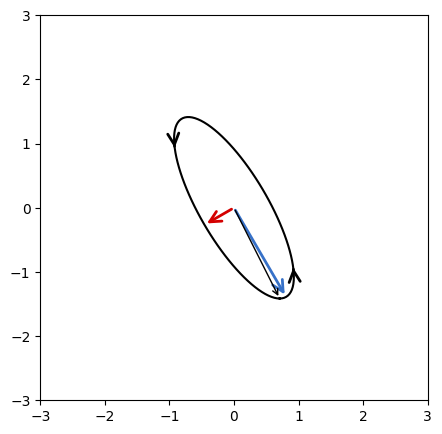

In [24]:
plot_polarizationEllipse([1/sqrt(2)-0.6j,-2/sqrt(2)+0.0j])
# plot_polarizationEllipse([-1.0-1.0j,0.8j])

(0.12503779997190356+0j)
(0.3536068437854442+0j)
0.0
0.3536068437854442
[0.70710678 0.        ]
[0.         0.61234157]
0.0
blue
0.0


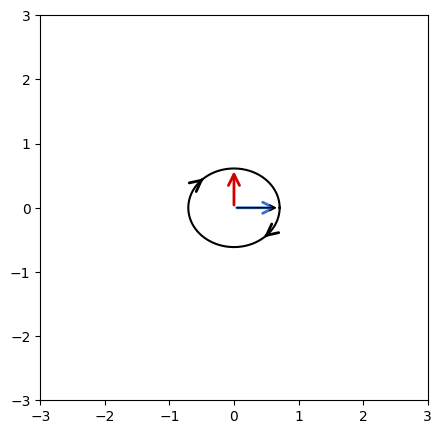

In [15]:
# Drawing a polarization ellipse

# check https://physics.stackexchange.com/questions/308009/how-can-i-get-the-axes-of-the-polarization-ellipse-from-the-jones-vector-of-the
# and references therein

#Jones vector 

J = 1*np.array([0.70710678+0.j, 0.+0.61234157j])
Js = np.conj(J)

Ex = abs(J[0])
phix = np.angle(J[0])

Ey = abs(J[1])
phiy = np.angle(J[1])

beta = np.sqrt(Js.dot(Js))

print(Js.dot(Js))
print(beta)
print(0.5*np.angle(beta)*180/pi)
print(abs(beta))

A = np.real(beta*J)/abs(beta)
B = np.imag(beta*J)/abs(beta)

print(A)
print(B)

fig = plt.subplots(figsize=(5,5))
ax1 = plt.subplot(111)


ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])

print(A[1])



# ax1.annotate("", xy=(0.5, 0.5), xytext=(0, 0),
#             arrowprops=dict(arrowstyle="->"))


draw_arrow(ax1,A,2,cc=cc[2])
draw_arrow(ax1,B,2,cc=cc[3])

print('blue')
print(arctan(A[1]/A[0])*180/pi)

m = 2*pi
n = 100
ts = np.linspace(0,m,n)
# print(ts)
Exs = [Ephys(J,x,0) for x in ts]
Eys = [Ephys(J,x,1) for x in ts]
draw_arrow(ax1,[Exs[0],Eys[0]],1,cc='k')

t1 = 2*pi/8
t2 = 2*pi*5/8
draw_turn(ax1,J,t1)
draw_turn(ax1,J,t2)
# dt = m/n
# Ata = np.array([Ephys(J,ta+dt,0)-Ephys(J,ta,0),Ephys(J,ta+dt,1)-Ephys(J,ta,1)])
# draw_arrow(ax1,Ata,2,cc='k',orig = (Ephys(J,ta,0),Ephys(J,ta,1)))

# print(Exs)
# print(Eys)
ax1.plot(Exs,Eys, color = 'k')

# draw_arrow(ax1,0,0,A[0],A[1],2,cc=cc[2])
# for nn in [ax1]:
#     nn.xaxis.grid(color='k', linestyle='-', linewidth=0.2)
#     nn.yaxis.grid(color='k', linestyle='-', linewidth=0.2)
#     nn.tick_params(axis='both', which='major', labelsize=16, length = 10, width = 1.2)
#     nn.tick_params(axis='both', which='minor', labelsize=16, length = 5, width = 1.1)
#     nn.legend(loc =1)

In [13]:
# **A

In [11]:
r = (3,4)

r[0]

3

In [12]:
np.angle(1+3j)

1.2490457723982544